# **Air Quality Prediction using Random Forest**

# Objective

Predict Air Quality Index (AQI) for Indian states based on historical pollutant data (SO2, NO2, RSPM, SPM, PM2.5) and temporal features (year, month).

Use a machine learning model to enable frontend predictions for any state/month/year.

# Modeling
Features and target:
Features: year, month, so2, no2, rspm, spm, pm2_5 + state one-hot columns
Target: AQI

# Scaling:
Numeric features scaled using StandardScaler (optional for RandomForest)

# Model:
RandomForestRegressor with 100 estimators

# Train/Test Split:
80/20 split

# Visualizations
Scatter plot: Actual vs Predicted AQI

Residual plot: Prediction errors vs Actual AQI

# Model Evaluation
Metrics computed:

Mean Absolute Error (MAE): 0.63

Mean Absolute Percentage Error (MAPE): 0.89%

Mean Squared Error (MSE): 1.20

Root Mean Squared Error (RMSE): 1.10

R² Score: 1.00

Adjusted R²: 1.00

**R² interpreted as “accuracy ≈ **99.76%**”**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_air_quality_aqi.csv to cleaned_air_quality_aqi.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("cleaned_air_quality_aqi.csv")

In [ ]:
numeric_cols = ['year', 'month', 'so2', 'no2', 'rspm', 'spm', 'pm2_5']
state_cols = [col for col in df.columns if col.startswith('state_')]
features = numeric_cols + state_cols

In [ ]:
X = df[features]
y = df['AQI']

In [ ]:
scaler = StandardScaler()
X.loc[:, numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

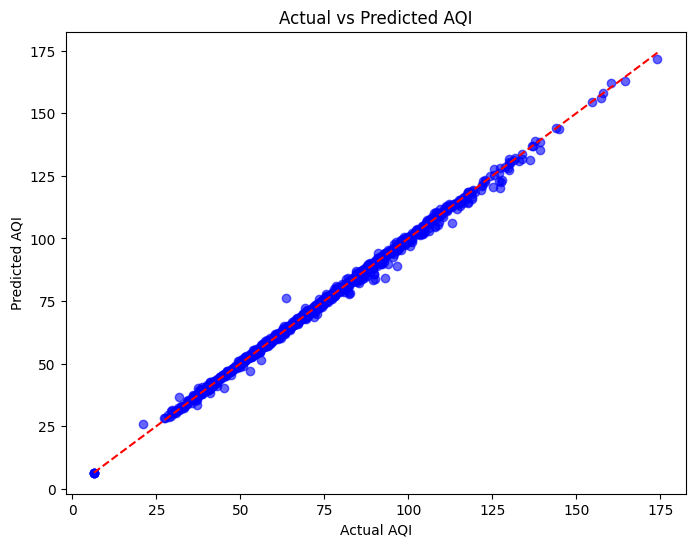

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

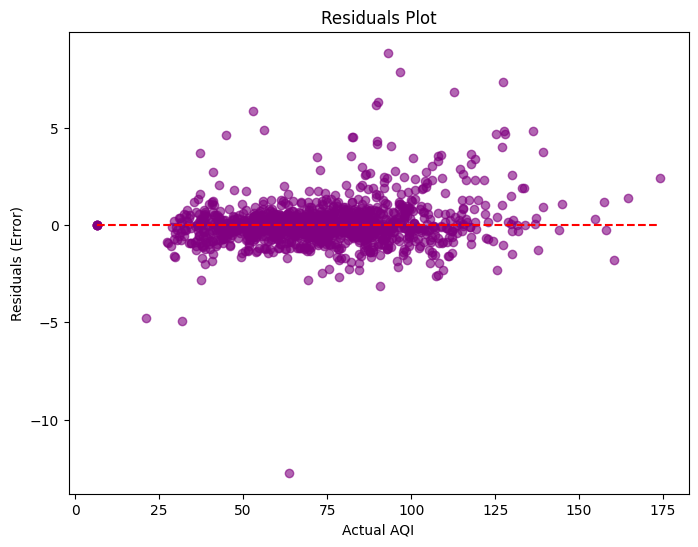

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='--')
plt.xlabel("Actual AQI")
plt.ylabel("Residuals (Error)")
plt.title("Residuals Plot")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Adjusted R²: {adj_r2:.2f}")

Mean Absolute Error (MAE): 0.63
Mean Absolute Percentage Error (MAPE): 0.89%
Mean Squared Error (MSE): 1.20
Root Mean Squared Error (RMSE): 1.10
R^2 Score: 1.00
Adjusted R²: 1.00


In [ ]:
r2_percent = r2 * 100
print(f"Model R² (accuracy approximation): {r2_percent:.2f}%")

Model R² (accuracy approximation): 99.76%
